<a href="https://colab.research.google.com/github/seansothey/Research_Project/blob/main/Diabetic_Retinopath_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://d2zo993x2i1w0h.cloudfront.net/live/2019/01/what-causes-diabetic-retinopathy-1024x642.jpg)

##Overview
Diabetic retinopathy is the leading cause of blindness in the working-age population of the developed world. It is estimated to affect over 93 million people.
The US Center for Disease Control and Prevention estimates that 29.1 million people in the US have diabetes and the World Health Organization estimates that 347 million people have the disease worldwide. Diabetic Retinopathy (DR) is an eye disease associated with long-standing diabetes. Around 40% to 45% of Americans with diabetes have some stage of the disease. Progression to vision impairment can be slowed or averted if DR is detected in time, however this can be difficult as the disease often shows few symptoms until it is too late to provide effective treatment.
Currently, detecting DR is a time-consuming and manual process that requires a trained clinician to examine and evaluate digital color fundus photographs of the retina. By the time human readers submit their reviews, often a day or two later, the delayed results lead to lost follow up, miscommunication, and delayed treatment.
Clinicians can identify DR by the presence of lesions associated with the vascular abnormalities caused by the disease. While this approach is effective, its resource demands are high. The expertise and equipment required are often lacking in areas where the rate of diabetes in local populations is high and DR detection is most needed. As the number of individuals with diabetes continues to grow, the infrastructure needed to prevent blindness due to DR will become even more insufficient.
The need for a comprehensive and automated method of DR screening has long been recognized, and previous efforts have made good progress using image classification, pattern recognition, and machine learning. With color fundus photography as input, the goal is to build an automated detection system to the limit of what is possible – ideally resulting in models with realistic clinical potential that can improve DR detection. This process requires many machine learning tasks and techniques to build a good classifier. To start, it is essential to obtain enough datasets, including useful information, such as number of attributes and classes.

##Datasets Description
The datasets are in image format with a large set of high-resolution retina images taken under a variety of imaging conditions. A left and right field is provided for every subject. Images are labeled with a subject id as well as either left or right (e.g. 1_left.jpeg is left eye of patient id 1).
Each image has been rated by clinicians on a scale 0 to 4 according to the presence of diabetic retinopathy.

*   0 - No DR
*   1 - Mild
*   2 - Moderate
*   3 - Severe
*   4 - Proliferative DR

The acquired images are in RGB form with high resolution JPEG format. Due to the extremely large size of this dataset, total to 82.23 GB, it was separated into archive folders. Each folder has around 8400 images, and total size about 8 GB. 
*   train.zip - the training set (5 folders)
*   test.zip - the test set (7 folders)
*   trainLabels.csv - contains the scores (0 to 4) for the training set

Dataset link: https://www.kaggle.com/c/diabetic-retinopathy-detection/data

**Machine Learning Techniques:** 


*   CNN 1, 3 and 5 layers
*   Max-Pooling
*   Data Augumentation

**Additionl Tools:**


*   Github & Kaggle: for hosting datasets and python notebook
*   Tableau: for report visualization









#Setup

In [2]:
#!pip install tensorflow-gpu

In [6]:
!nvidia-smi

Wed Oct 14 06:51:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
# Common Import
import sklearn
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import os
import time
import random

import tarfile
import cv2
from google.colab.patches import cv2_imshow

# to make this notebook's output stable across runs
np.random.seed(168)

from zipfile import ZipFile

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")

# sklearn version > 0.20 is required 
sklearn.__version__
# Update sklearn -> !pip install -U scikit-learn

'0.22.2.post1'

Connect to google drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preprocessing Data

In [6]:
!unzip "/content/drive/My Drive/train.zip"

Archive:  /content/drive/My Drive/train.zip
replace train/10003_left.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
DR_data = os.listdir('/content/train')

In [9]:
len(DR_data)

8407

###Create the images dataset

In [10]:
def create_img_set(imgs_folder_path):
  x=[]
  lst = os.listdir(imgs_folder_path)
  for img in lst:
    img_imr = cv2.imread(os.path.join(imgs_folder_path, img))
    img_imr = cv2.resize(img_imr,(256,256)) # resize images
    x.append(np.array(img_imr))
  return x

In [11]:
data = create_img_set(os.path.join('/content/train'))

Show some images

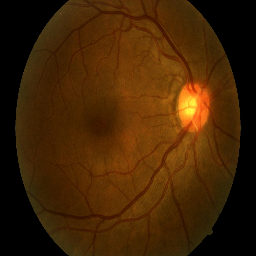

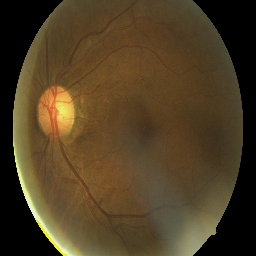

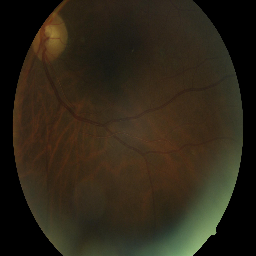

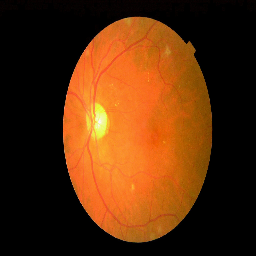

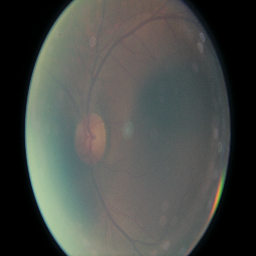

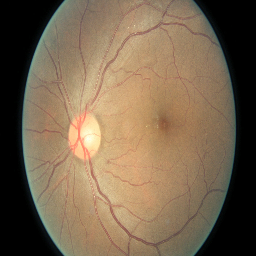

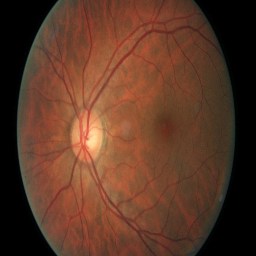

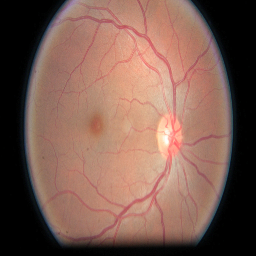

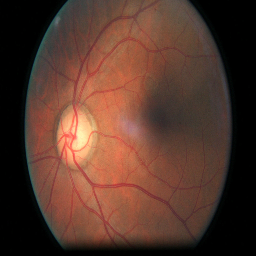

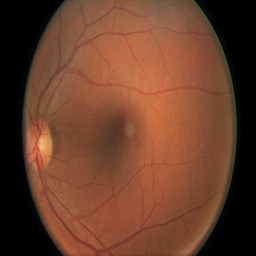

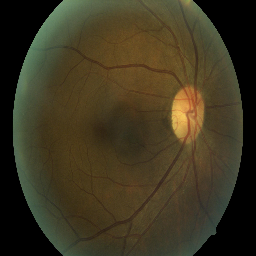

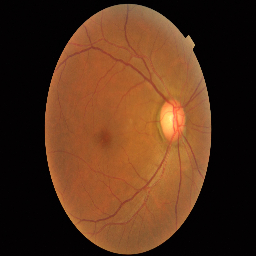

In [12]:
for i in range(0,12):
  cv2_imshow(data[i])

###Flattening the images dataset

In [13]:
data_flatten = np.array(data)

In [14]:
data_flatten.shape

(8407, 256, 256, 3)

###Scale the dataset

In [15]:
np.amax(data_flatten) # See the maximum value before scale

255

Scale to (0,1) by deviding with max. value 255

In [16]:
data_scale = data_flatten.astype('float32')/255.0

###Create label y

In [17]:
all_label = pd.read_csv("/content/trainLabels.csv")

In [18]:
all_label

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


Let's check if the classes are balanced

In [19]:
print(all_label.groupby('level').nunique())

       image
level       
0      25810
1       2443
2       5292
3        873
4        708


Because we use only subset 8407 images; therefore, we have to extract label correctly.

In [20]:
label = []

In [21]:
file_dir = os.path.join('/content/train')
files = [os.path.join(file_dir, fname) for fname in DR_data]
for fname in DR_data:
  label.append(fname.split(".")[0]) 

In [22]:
label = pd.DataFrame(label,columns=['image'])

In [23]:
new_label = pd.merge(label, all_label, on=['image'])

In [24]:
new_label

,image,level
0,17449_right,0
1,15089_left,0
2,16777_left,2
3,10924_left,2
4,14379_right,0
...,...,...
8402,11113_left,0
8403,18995_right,1
8404,18147_left,0
8405,12503_left,2


Check the balance of the classes

In [25]:
print(new_label.groupby('level').nunique())

       image
level       
0       6149
1        588
2       1283
3        221
4        166


We can see, the subset contents imbalance clasess.

Let's verify with first and last file name to see if it's matched.

In [26]:
DR_data[0], new_label['image'][0]

('17449_right.jpeg', '17449_right')

In [27]:
DR_data[4000], new_label['image'][4000]

('13175_left.jpeg', '13175_left')

In [28]:
DR_data[8000], new_label['image'][8000]

('12108_left.jpeg', '12108_left')

Therefore, the new label is created correctly and good to go!!!

In [29]:
target = new_label['level']

Split training and testing set 80:20

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data_scale, target, test_size=0.3, random_state=42)

In [31]:
class_name = ['No DR','Mild','Moderate','Severe','Proliferative DR']

In [32]:
y_train_cat = to_categorical(y_train, num_classes=len(class_name))

In [33]:
y_test_cat = to_categorical(y_test, num_classes=len(class_name))

##CNN 5-layers 

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers, optimizers
import tensorflow as tf
print(tf.__version__)

np.random.seed(168)

2.3.0


Instantiate some optimizers

In [35]:
sgd = optimizers.SGD(learning_rate=0.01)
rms = optimizers.RMSprop(learning_rate=0.001, rho=0.9)
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [36]:
cnn5 = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', strides=(2,2), input_shape=(256,256,3)),  # 1st layer
    MaxPooling2D(pool_size=(2, 2),strides=2),

    Conv2D(32, kernel_size=(3,3), activation='relu'), # 2nd layer
    MaxPooling2D(pool_size=(2,2), strides=2),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3,3), activation='relu',  kernel_regularizer=regularizers.l2(0.01)), # 3rd layer
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.2),

    Conv2D(16, kernel_size=(3,3), activation='relu'), # 4th layer
    MaxPooling2D(pool_size=(2,2), strides=1),
    BatchNormalization(),

    Conv2D(16, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)), # 5th layer
    MaxPooling2D(pool_size=(2,2), strides=1),
    Dropout(0.2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

In [37]:
#For Classification use 'categorical_crossentropy' or 'binary_crossentropy'
#For Regression use 'mean_square_error'
cnn5.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])

In [38]:
cnn5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0

###Training the model

In [39]:
tr5 = cnn5.fit(X_train, y_train_cat, 
          batch_size=50, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
95/95 [==============================] - 2s 26ms/step - loss: 1.3959 - accuracy: 0.7217 - val_loss: 1.6236 - val_accuracy: 0.7468
Epoch 2/20
95/95 [==============================] - 2s 23ms/step - loss: 1.3377 - accuracy: 0.7351 - val_loss: 1.3399 - val_accuracy: 0.7468
Epoch 3/20
95/95 [==============================] - 2s 23ms/step - loss: 1.3083 - accuracy: 0.7353 - val_loss: 1.3403 - val_accuracy: 0.7468
Epoch 4/20
95/95 [==============================] - 2s 23ms/step - loss: 1.2877 - accuracy: 0.7351 - val_loss: 1.2755 - val_accuracy: 0.7468
Epoch 5/20
95/95 [==============================] - 2s 23ms/step - loss: 1.2645 - accuracy: 0.7351 - val_loss: 1.2486 - val_accuracy: 0.7468
Epoch 6/20
95/95 [==============================] - 2s 23ms/step - loss: 1.2489 - accuracy: 0.7351 - val_loss: 1.2137 - val_accuracy: 0.7468
Epoch 7/20
95/95 [==============================] - 2s 23ms/step - loss: 1.2281 - accuracy: 0.7351 - val_loss: 1.2415 - val_accuracy: 0.7468
Epoch 8/20
95

###See the accuracy

In [40]:
score5 = cnn5.evaluate(X_test, y_test_cat, verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Test loss: 1.2044956684112549
Test accuracy: 0.7173998951911926


It's very low, let's try some more layers and augument dataset.

###See the prediction

In [41]:
pred_test = cnn5.predict_classes(X_test, verbose=0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [42]:
pred_test

array([0, 0, 0, ..., 0, 0, 0])

###Plot the learning curve

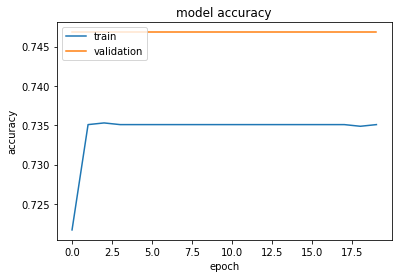

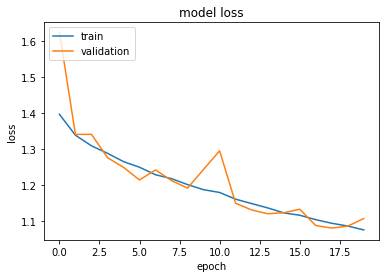

In [43]:
plt.plot(tr5.history['accuracy'])
plt.plot(tr5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(tr5.history['loss'])
plt.plot(tr5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [44]:
# Save the model as h5 file
from tensorflow.keras.models import load_model
cnn5.save('CNN5_Layers.h5')

###Classification Report

In [45]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(6)]
print(classification_report(y_test, pred_test, target_names=class_name))

                  precision    recall  f1-score   support

           No DR       0.72      1.00      0.84      1810
            Mild       0.00      0.00      0.00       211
        Moderate       0.00      0.00      0.00       386
          Severe       0.00      0.00      0.00        68
Proliferative DR       0.00      0.00      0.00        48

        accuracy                           0.72      2523
       macro avg       0.14      0.20      0.17      2523
    weighted avg       0.51      0.72      0.60      2523



###Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

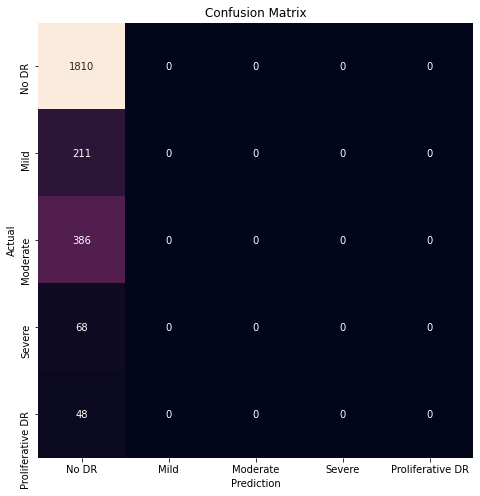

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

fig, ax = plt.subplots(figsize=(8,8)) 
mat = confusion_matrix(pred_test, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_name,
            yticklabels=class_name)
plt.xlabel('Prediction')
plt.ylabel('Actual');
plt.title('Confusion Matrix')

##Tuning hyperparameters with Keras Tuner

In [ ]:
#!pip install keras-tuner

In [49]:
import tensorflow as tf
import kerastuner as kt

In [51]:
def build_model(hp):
  inputs = tf.keras.Input(shape=(256, 256, 3))
  x = inputs
  for i in range(hp.Int('conv_blocks', 3, 5, default=3)):
    filters = hp.Int('filters_' + str(i), 32, 256, step=32)
    for _ in range(2):
      x = tf.keras.layers.Convolution2D(
        filters, kernel_size=(3, 3), padding='same')(x)
      x = tf.keras.layers.BatchNormalization()(x)
      x = tf.keras.layers.ReLU()(x)
    if hp.Choice('pooling_' + str(i), ['avg', 'max']) == 'max':
      x = tf.keras.layers.MaxPool2D()(x)
    else:
      x = tf.keras.layers.AvgPool2D()(x)
  x = tf.keras.layers.GlobalAvgPool2D()(x)
  x = tf.keras.layers.Dense(
      hp.Int('hidden_size', 30, 100, step=10, default=50),
      activation='relu')(x)
  x = tf.keras.layers.Dropout(
      hp.Float('dropout', 0, 0.5, step=0.1, default=0.5))(x)
  outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

  model = tf.keras.Model(inputs, outputs)
  model.compile(
    optimizer=tf.keras.optimizers.Adam(
      hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
  return model

In [52]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    executions_per_trial=2,
    directory='Hyperband',
    project_name='Face_Expression')

In [55]:
tuner.search(X_train, y_train_cat,
             validation_split=0.2, 
             epochs=10)

Epoch 1/2
148/148 [==============================] - 65s 440ms/step - loss: 0.9178 - accuracy: 0.7325 - val_loss: 0.8649 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 64s 431ms/step - loss: 0.8886 - accuracy: 0.7351 - val_loss: 0.9002 - val_accuracy: 0.7468
Epoch 1/2
148/148 [==============================] - 64s 432ms/step - loss: 0.9211 - accuracy: 0.7317 - val_loss: 0.9468 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 64s 431ms/step - loss: 0.8793 - accuracy: 0.7351 - val_loss: 0.8555 - val_accuracy: 0.7468


Epoch 1/2
148/148 [==============================] - 61s 413ms/step - loss: 0.9310 - accuracy: 0.7306 - val_loss: 0.8479 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 60s 404ms/step - loss: 0.8948 - accuracy: 0.7351 - val_loss: 0.8470 - val_accuracy: 0.7468
Epoch 1/2
148/148 [==============================] - 60s 406ms/step - loss: 0.9303 - accuracy: 0.7279 - val_loss: 0.8588 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 60s 404ms/step - loss: 0.9042 - accuracy: 0.7349 - val_loss: 0.8569 - val_accuracy: 0.7468


Epoch 1/2
148/148 [==============================] - 80s 543ms/step - loss: 1.1799 - accuracy: 0.6361 - val_loss: 1.2635 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 79s 533ms/step - loss: 0.9346 - accuracy: 0.7304 - val_loss: 1.0210 - val_accuracy: 0.7468
Epoch 1/2
148/148 [==============================] - 79s 535ms/step - loss: 0.9958 - accuracy: 0.7183 - val_loss: 1.0549 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 79s 533ms/step - loss: 0.9289 - accuracy: 0.7334 - val_loss: 0.9100 - val_accuracy: 0.7468


Epoch 1/2
148/148 [==============================] - 22s 151ms/step - loss: 0.9339 - accuracy: 0.7208 - val_loss: 0.8758 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 21s 145ms/step - loss: 0.8881 - accuracy: 0.7351 - val_loss: 0.8814 - val_accuracy: 0.7468
Epoch 1/2
148/148 [==============================] - 22s 147ms/step - loss: 0.9122 - accuracy: 0.7306 - val_loss: 0.8828 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 21s 145ms/step - loss: 0.8873 - accuracy: 0.7351 - val_loss: 0.8507 - val_accuracy: 0.7468


Epoch 1/2
148/148 [==============================] - 34s 227ms/step - loss: 0.9180 - accuracy: 0.7264 - val_loss: 0.8561 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 33s 222ms/step - loss: 0.8830 - accuracy: 0.7351 - val_loss: 0.8774 - val_accuracy: 0.7468
Epoch 1/2
148/148 [==============================] - 33s 224ms/step - loss: 0.9055 - accuracy: 0.7306 - val_loss: 0.8802 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 33s 222ms/step - loss: 0.8881 - accuracy: 0.7351 - val_loss: 0.8976 - val_accuracy: 0.7468


Epoch 1/2
148/148 [==============================] - 60s 403ms/step - loss: 0.9649 - accuracy: 0.7272 - val_loss: 0.9243 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 59s 401ms/step - loss: 0.9150 - accuracy: 0.7351 - val_loss: 0.8468 - val_accuracy: 0.7468
Epoch 1/2
148/148 [==============================] - 60s 403ms/step - loss: 0.9700 - accuracy: 0.7283 - val_loss: 0.8394 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 59s 401ms/step - loss: 0.9105 - accuracy: 0.7351 - val_loss: 0.8416 - val_accuracy: 0.7468


Epoch 1/2
148/148 [==============================] - 62s 417ms/step - loss: 1.0559 - accuracy: 0.6915 - val_loss: 0.9069 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 61s 413ms/step - loss: 0.9015 - accuracy: 0.7347 - val_loss: 0.8999 - val_accuracy: 0.7468
Epoch 1/2
148/148 [==============================] - 61s 414ms/step - loss: 1.0871 - accuracy: 0.6724 - val_loss: 0.8744 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 61s 412ms/step - loss: 0.9074 - accuracy: 0.7344 - val_loss: 1.0994 - val_accuracy: 0.7468


Epoch 1/2
148/148 [==============================] - 72s 490ms/step - loss: 0.9231 - accuracy: 0.7289 - val_loss: 0.8904 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 72s 484ms/step - loss: 0.8895 - accuracy: 0.7351 - val_loss: 0.8480 - val_accuracy: 0.7468
Epoch 1/2
148/148 [==============================] - 72s 485ms/step - loss: 0.9182 - accuracy: 0.7285 - val_loss: 0.9069 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 72s 484ms/step - loss: 0.8978 - accuracy: 0.7351 - val_loss: 0.9072 - val_accuracy: 0.7468


Epoch 1/2
148/148 [==============================] - 72s 484ms/step - loss: 0.9534 - accuracy: 0.7268 - val_loss: 0.8858 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 71s 481ms/step - loss: 0.9116 - accuracy: 0.7351 - val_loss: 0.8573 - val_accuracy: 0.7468
Epoch 1/2
148/148 [==============================] - 71s 482ms/step - loss: 0.9550 - accuracy: 0.7270 - val_loss: 1.0396 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 71s 481ms/step - loss: 0.9186 - accuracy: 0.7351 - val_loss: 0.8807 - val_accuracy: 0.7468


Epoch 1/2
148/148 [==============================] - 74s 497ms/step - loss: 0.9144 - accuracy: 0.7313 - val_loss: 0.8539 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 73s 494ms/step - loss: 0.8851 - accuracy: 0.7351 - val_loss: 0.8741 - val_accuracy: 0.7468
Epoch 1/2
148/148 [==============================] - 73s 496ms/step - loss: 0.9118 - accuracy: 0.7281 - val_loss: 0.9678 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 73s 494ms/step - loss: 0.8908 - accuracy: 0.7351 - val_loss: 0.8658 - val_accuracy: 0.7468


Epoch 1/2
148/148 [==============================] - 13s 86ms/step - loss: 0.9306 - accuracy: 0.7289 - val_loss: 0.8701 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 12s 81ms/step - loss: 0.9016 - accuracy: 0.7349 - val_loss: 0.9267 - val_accuracy: 0.7468
Epoch 1/2
148/148 [==============================] - 12s 83ms/step - loss: 0.9371 - accuracy: 0.7281 - val_loss: 0.9495 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 12s 82ms/step - loss: 0.9068 - accuracy: 0.7347 - val_loss: 0.9503 - val_accuracy: 0.7468


Epoch 1/2
148/148 [==============================] - 42s 285ms/step - loss: 0.9229 - accuracy: 0.7285 - val_loss: 1.0388 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 41s 280ms/step - loss: 0.8860 - accuracy: 0.7349 - val_loss: 0.8478 - val_accuracy: 0.7468
Epoch 1/2
148/148 [==============================] - 42s 282ms/step - loss: 0.9196 - accuracy: 0.7287 - val_loss: 0.9929 - val_accuracy: 0.7468
Epoch 2/2
148/148 [==============================] - 41s 280ms/step - loss: 0.8860 - accuracy: 0.7351 - val_loss: 0.8971 - val_accuracy: 0.7468


Epoch 3/4
148/148 [==============================] - 64s 433ms/step - loss: 0.9284 - accuracy: 0.7221 - val_loss: 1.5392 - val_accuracy: 0.7468
Epoch 4/4
148/148 [==============================] - 64s 431ms/step - loss: 0.8863 - accuracy: 0.7351 - val_loss: 0.8618 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 64s 433ms/step - loss: 0.9238 - accuracy: 0.7242 - val_loss: 0.8470 - val_accuracy: 0.7468
Epoch 4/4
148/148 [==============================] - 64s 431ms/step - loss: 0.8905 - accuracy: 0.7351 - val_loss: 0.8546 - val_accuracy: 0.7468


Epoch 3/4
148/148 [==============================] - 60s 406ms/step - loss: 0.9372 - accuracy: 0.7257 - val_loss: 1.5134 - val_accuracy: 0.7468
Epoch 4/4
148/148 [==============================] - 60s 404ms/step - loss: 0.8985 - accuracy: 0.7351 - val_loss: 0.8762 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 60s 405ms/step - loss: 0.9328 - accuracy: 0.7293 - val_loss: 0.9290 - val_accuracy: 0.7468
Epoch 4/4
148/148 [==============================] - 60s 404ms/step - loss: 0.8995 - accuracy: 0.7353 - val_loss: 0.8523 - val_accuracy: 0.7468


Epoch 3/4
148/148 [==============================] - 79s 535ms/step - loss: 1.0055 - accuracy: 0.7157 - val_loss: 1.2723 - val_accuracy: 0.7468
Epoch 4/4
148/148 [==============================] - 79s 533ms/step - loss: 0.9155 - accuracy: 0.7334 - val_loss: 0.9028 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 79s 535ms/step - loss: 1.0711 - accuracy: 0.6641 - val_loss: 1.0235 - val_accuracy: 0.7468
Epoch 4/4
148/148 [==============================] - 79s 533ms/step - loss: 0.9257 - accuracy: 0.7330 - val_loss: 0.9274 - val_accuracy: 0.7468


Epoch 3/4
148/148 [==============================] - 22s 146ms/step - loss: 0.9002 - accuracy: 0.7293 - val_loss: 0.9126 - val_accuracy: 0.7468
Epoch 4/4
148/148 [==============================] - 21s 144ms/step - loss: 0.8882 - accuracy: 0.7351 - val_loss: 0.8455 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 22s 146ms/step - loss: 0.9158 - accuracy: 0.7298 - val_loss: 0.9257 - val_accuracy: 0.7468
Epoch 4/4
148/148 [==============================] - 21s 144ms/step - loss: 0.8894 - accuracy: 0.7351 - val_loss: 0.8392 - val_accuracy: 0.7468


Epoch 5/10
148/148 [==============================] - 64s 432ms/step - loss: 0.9167 - accuracy: 0.7255 - val_loss: 0.9907 - val_accuracy: 0.7468
Epoch 6/10
148/148 [==============================] - 64s 430ms/step - loss: 0.8884 - accuracy: 0.7351 - val_loss: 0.8531 - val_accuracy: 0.7468
Epoch 7/10
148/148 [==============================] - 64s 431ms/step - loss: 0.8848 - accuracy: 0.7351 - val_loss: 0.8487 - val_accuracy: 0.7468
Epoch 8/10
148/148 [==============================] - 64s 430ms/step - loss: 0.8855 - accuracy: 0.7351 - val_loss: 0.9036 - val_accuracy: 0.7468
Epoch 9/10
148/148 [==============================] - 64s 431ms/step - loss: 0.8765 - accuracy: 0.7351 - val_loss: 0.8914 - val_accuracy: 0.7468
Epoch 10/10
148/148 [==============================] - 64s 430ms/step - loss: 0.8764 - accuracy: 0.7351 - val_loss: 1.3472 - val_accuracy: 0.7468
Epoch 5/10
148/148 [==============================] - 64s 432ms/step - loss: 0.9122 - accuracy: 0.7321 - val_loss: 0.9340 - val_a

Epoch 5/10
148/148 [==============================] - 60s 406ms/step - loss: 0.9338 - accuracy: 0.7264 - val_loss: 0.8441 - val_accuracy: 0.7468
Epoch 6/10
148/148 [==============================] - 60s 404ms/step - loss: 0.8978 - accuracy: 0.7351 - val_loss: 0.8474 - val_accuracy: 0.7468
Epoch 7/10
148/148 [==============================] - 60s 405ms/step - loss: 0.8899 - accuracy: 0.7351 - val_loss: 0.8439 - val_accuracy: 0.7468
Epoch 8/10
148/148 [==============================] - 60s 404ms/step - loss: 0.8848 - accuracy: 0.7351 - val_loss: 0.8546 - val_accuracy: 0.7468
Epoch 9/10
148/148 [==============================] - 60s 404ms/step - loss: 0.8889 - accuracy: 0.7351 - val_loss: 0.8952 - val_accuracy: 0.7468
Epoch 10/10
148/148 [==============================] - 60s 404ms/step - loss: 0.8801 - accuracy: 0.7351 - val_loss: 0.8384 - val_accuracy: 0.7468
Epoch 5/10
148/148 [==============================] - 60s 406ms/step - loss: 0.9411 - accuracy: 0.7283 - val_loss: 0.9535 - val_a

Epoch 1/4
148/148 [==============================] - 26s 173ms/step - loss: 0.9064 - accuracy: 0.7313 - val_loss: 0.8718 - val_accuracy: 0.7468
Epoch 2/4
148/148 [==============================] - 25s 170ms/step - loss: 0.8910 - accuracy: 0.7351 - val_loss: 0.8519 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 25s 170ms/step - loss: 0.8833 - accuracy: 0.7351 - val_loss: 0.8511 - val_accuracy: 0.7468
Epoch 4/4
148/148 [==============================] - 25s 170ms/step - loss: 0.8813 - accuracy: 0.7351 - val_loss: 0.8465 - val_accuracy: 0.7468
Epoch 1/4
148/148 [==============================] - 25s 172ms/step - loss: 0.9162 - accuracy: 0.7274 - val_loss: 0.8704 - val_accuracy: 0.7468
Epoch 2/4
148/148 [==============================] - 25s 170ms/step - loss: 0.8864 - accuracy: 0.7351 - val_loss: 0.8494 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 25s 170ms/step - loss: 0.8836 - accuracy: 0.7351 - val_loss: 0.8567 - val_accuracy:

Epoch 1/4
148/148 [==============================] - 52s 354ms/step - loss: 0.9086 - accuracy: 0.7257 - val_loss: 0.8704 - val_accuracy: 0.7468
Epoch 2/4
148/148 [==============================] - 52s 351ms/step - loss: 0.8865 - accuracy: 0.7351 - val_loss: 0.8414 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 52s 351ms/step - loss: 0.8745 - accuracy: 0.7351 - val_loss: 0.8522 - val_accuracy: 0.7468
Epoch 4/4
148/148 [==============================] - 52s 351ms/step - loss: 0.8772 - accuracy: 0.7351 - val_loss: 0.8463 - val_accuracy: 0.7468
Epoch 1/4
148/148 [==============================] - 52s 353ms/step - loss: 0.9111 - accuracy: 0.7293 - val_loss: 0.8449 - val_accuracy: 0.7468
Epoch 2/4
148/148 [==============================] - 52s 351ms/step - loss: 0.8797 - accuracy: 0.7351 - val_loss: 0.8691 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 52s 351ms/step - loss: 0.8796 - accuracy: 0.7351 - val_loss: 0.8380 - val_accuracy:

Epoch 1/4
148/148 [==============================] - 69s 467ms/step - loss: 0.9281 - accuracy: 0.7272 - val_loss: 0.9109 - val_accuracy: 0.7468
Epoch 2/4
148/148 [==============================] - 69s 464ms/step - loss: 0.8982 - accuracy: 0.7351 - val_loss: 0.8488 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 69s 464ms/step - loss: 0.8874 - accuracy: 0.7351 - val_loss: 0.8574 - val_accuracy: 0.7468
Epoch 4/4
148/148 [==============================] - 69s 464ms/step - loss: 0.8828 - accuracy: 0.7351 - val_loss: 0.8428 - val_accuracy: 0.7468
Epoch 1/4
148/148 [==============================] - 69s 465ms/step - loss: 0.9179 - accuracy: 0.7293 - val_loss: 0.8837 - val_accuracy: 0.7468
Epoch 2/4
148/148 [==============================] - 69s 464ms/step - loss: 0.8921 - accuracy: 0.7351 - val_loss: 0.8467 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 69s 464ms/step - loss: 0.8854 - accuracy: 0.7351 - val_loss: 1.0437 - val_accuracy:

Epoch 1/4
148/148 [==============================] - 18s 122ms/step - loss: 1.2955 - accuracy: 0.5434 - val_loss: 1.2937 - val_accuracy: 0.7468
Epoch 2/4
148/148 [==============================] - 18s 118ms/step - loss: 1.0133 - accuracy: 0.7123 - val_loss: 0.9833 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 18s 119ms/step - loss: 0.9776 - accuracy: 0.7172 - val_loss: 0.9012 - val_accuracy: 0.7468
Epoch 4/4
148/148 [==============================] - 18s 118ms/step - loss: 0.9561 - accuracy: 0.7232 - val_loss: 0.8765 - val_accuracy: 0.7468
Epoch 1/4
148/148 [==============================] - 18s 121ms/step - loss: 1.1794 - accuracy: 0.5915 - val_loss: 1.2275 - val_accuracy: 0.7468
Epoch 2/4
148/148 [==============================] - 18s 118ms/step - loss: 0.9649 - accuracy: 0.7098 - val_loss: 0.8975 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 18s 119ms/step - loss: 0.9493 - accuracy: 0.7247 - val_loss: 0.8383 - val_accuracy:

Epoch 1/4
148/148 [==============================] - 28s 190ms/step - loss: 0.9752 - accuracy: 0.7255 - val_loss: 0.8481 - val_accuracy: 0.7468
Epoch 2/4
148/148 [==============================] - 28s 188ms/step - loss: 0.9077 - accuracy: 0.7351 - val_loss: 0.8659 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 28s 188ms/step - loss: 0.9005 - accuracy: 0.7351 - val_loss: 0.8509 - val_accuracy: 0.7468
Epoch 4/4
148/148 [==============================] - 28s 188ms/step - loss: 0.8892 - accuracy: 0.7351 - val_loss: 0.8379 - val_accuracy: 0.7468
Epoch 1/4
148/148 [==============================] - 28s 189ms/step - loss: 0.9716 - accuracy: 0.7198 - val_loss: 0.8677 - val_accuracy: 0.7468
Epoch 2/4
148/148 [==============================] - 28s 188ms/step - loss: 0.9100 - accuracy: 0.7351 - val_loss: 0.8411 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 28s 188ms/step - loss: 0.8991 - accuracy: 0.7351 - val_loss: 0.8418 - val_accuracy:

Epoch 1/4
148/148 [==============================] - 61s 413ms/step - loss: 0.9665 - accuracy: 0.7123 - val_loss: 0.8934 - val_accuracy: 0.7468
Epoch 2/4
148/148 [==============================] - 61s 411ms/step - loss: 0.8947 - accuracy: 0.7349 - val_loss: 0.8539 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 61s 411ms/step - loss: 0.8918 - accuracy: 0.7351 - val_loss: 0.8550 - val_accuracy: 0.7468
Epoch 4/4
148/148 [==============================] - 61s 411ms/step - loss: 0.8862 - accuracy: 0.7351 - val_loss: 0.8444 - val_accuracy: 0.7468
Epoch 1/4
148/148 [==============================] - 61s 413ms/step - loss: 0.9654 - accuracy: 0.7119 - val_loss: 1.0777 - val_accuracy: 0.7468
Epoch 2/4
148/148 [==============================] - 61s 411ms/step - loss: 0.9019 - accuracy: 0.7336 - val_loss: 0.8642 - val_accuracy: 0.7468
Epoch 3/4
148/148 [==============================] - 61s 411ms/step - loss: 0.8959 - accuracy: 0.7349 - val_loss: 0.8670 - val_accuracy:

Epoch 5/10
148/148 [==============================] - 25s 172ms/step - loss: 0.9089 - accuracy: 0.7319 - val_loss: 0.8720 - val_accuracy: 0.7468
Epoch 6/10
148/148 [==============================] - 25s 170ms/step - loss: 0.8876 - accuracy: 0.7351 - val_loss: 0.8420 - val_accuracy: 0.7468
Epoch 7/10
148/148 [==============================] - 25s 170ms/step - loss: 0.8842 - accuracy: 0.7351 - val_loss: 0.8530 - val_accuracy: 0.7468
Epoch 8/10
148/148 [==============================] - 25s 170ms/step - loss: 0.8864 - accuracy: 0.7351 - val_loss: 0.8464 - val_accuracy: 0.7468
Epoch 9/10
148/148 [==============================] - 25s 170ms/step - loss: 0.8762 - accuracy: 0.7351 - val_loss: 0.8378 - val_accuracy: 0.7468
Epoch 10/10
148/148 [==============================] - 25s 170ms/step - loss: 0.8772 - accuracy: 0.7351 - val_loss: 0.8384 - val_accuracy: 0.7468
Epoch 5/10
148/148 [==============================] - 25s 172ms/step - loss: 0.9226 - accuracy: 0.7283 - val_loss: 0.8673 - val_a

Epoch 5/10
148/148 [==============================] - 52s 353ms/step - loss: 0.8976 - accuracy: 0.7340 - val_loss: 0.9300 - val_accuracy: 0.7468
Epoch 6/10
148/148 [==============================] - 52s 350ms/step - loss: 0.8815 - accuracy: 0.7351 - val_loss: 0.8444 - val_accuracy: 0.7468
Epoch 7/10
148/148 [==============================] - 52s 351ms/step - loss: 0.8784 - accuracy: 0.7351 - val_loss: 0.8516 - val_accuracy: 0.7468
Epoch 8/10
148/148 [==============================] - 52s 351ms/step - loss: 0.8777 - accuracy: 0.7351 - val_loss: 0.8602 - val_accuracy: 0.7468
Epoch 9/10
148/148 [==============================] - 52s 351ms/step - loss: 0.8732 - accuracy: 0.7351 - val_loss: 0.8864 - val_accuracy: 0.7468
Epoch 10/10
148/148 [==============================] - 52s 351ms/step - loss: 0.8720 - accuracy: 0.7351 - val_loss: 0.8465 - val_accuracy: 0.7468
Epoch 5/10
148/148 [==============================] - 52s 352ms/step - loss: 0.8992 - accuracy: 0.7325 - val_loss: 0.8712 - val_a

Epoch 1/10
148/148 [==============================] - 35s 239ms/step - loss: 0.9854 - accuracy: 0.7109 - val_loss: 0.9413 - val_accuracy: 0.7468
Epoch 2/10
148/148 [==============================] - 35s 235ms/step - loss: 0.9155 - accuracy: 0.7319 - val_loss: 0.9253 - val_accuracy: 0.7468
Epoch 3/10
148/148 [==============================] - 35s 235ms/step - loss: 0.9031 - accuracy: 0.7351 - val_loss: 0.9251 - val_accuracy: 0.7468
Epoch 4/10
148/148 [==============================] - 35s 235ms/step - loss: 0.8941 - accuracy: 0.7351 - val_loss: 0.8517 - val_accuracy: 0.7468
Epoch 5/10
148/148 [==============================] - 35s 235ms/step - loss: 0.8940 - accuracy: 0.7351 - val_loss: 0.8569 - val_accuracy: 0.7468
Epoch 6/10
148/148 [==============================] - 35s 235ms/step - loss: 0.8890 - accuracy: 0.7351 - val_loss: 0.8746 - val_accuracy: 0.7468
Epoch 7/10
148/148 [==============================] - 35s 235ms/step - loss: 0.8869 - accuracy: 0.7349 - val_loss: 0.8803 - val_ac

Epoch 1/10
148/148 [==============================] - 79s 535ms/step - loss: 0.9072 - accuracy: 0.7262 - val_loss: 0.8715 - val_accuracy: 0.7468
Epoch 2/10
148/148 [==============================] - 79s 532ms/step - loss: 0.8801 - accuracy: 0.7351 - val_loss: 0.9097 - val_accuracy: 0.7468
Epoch 3/10
148/148 [==============================] - 79s 532ms/step - loss: 0.8781 - accuracy: 0.7351 - val_loss: 0.8380 - val_accuracy: 0.7468
Epoch 4/10
148/148 [==============================] - 79s 532ms/step - loss: 0.8741 - accuracy: 0.7351 - val_loss: 0.9602 - val_accuracy: 0.6950
Epoch 5/10
148/148 [==============================] - 79s 533ms/step - loss: 0.8761 - accuracy: 0.7351 - val_loss: 0.8546 - val_accuracy: 0.7468
Epoch 6/10
148/148 [==============================] - 79s 532ms/step - loss: 0.8721 - accuracy: 0.7351 - val_loss: 0.8528 - val_accuracy: 0.7468
Epoch 7/10
148/148 [==============================] - 79s 532ms/step - loss: 0.8716 - accuracy: 0.7351 - val_loss: 0.8392 - val_ac

Epoch 1/10
148/148 [==============================] - 27s 180ms/step - loss: 0.8960 - accuracy: 0.7276 - val_loss: 0.8654 - val_accuracy: 0.7468
Epoch 2/10
148/148 [==============================] - 26s 177ms/step - loss: 0.8682 - accuracy: 0.7351 - val_loss: 0.8541 - val_accuracy: 0.7468
Epoch 3/10
148/148 [==============================] - 26s 177ms/step - loss: 0.8609 - accuracy: 0.7347 - val_loss: 0.8456 - val_accuracy: 0.7468
Epoch 4/10
148/148 [==============================] - 26s 177ms/step - loss: 0.8620 - accuracy: 0.7351 - val_loss: 0.8419 - val_accuracy: 0.7468
Epoch 5/10
148/148 [==============================] - 26s 177ms/step - loss: 0.8608 - accuracy: 0.7351 - val_loss: 0.8409 - val_accuracy: 0.7460
Epoch 6/10
148/148 [==============================] - 26s 177ms/step - loss: 0.8566 - accuracy: 0.7353 - val_loss: 0.8356 - val_accuracy: 0.7468
Epoch 7/10
148/148 [==============================] - 26s 177ms/step - loss: 0.8560 - accuracy: 0.7353 - val_loss: 0.8569 - val_ac

Epoch 1/10
148/148 [==============================] - 33s 222ms/step - loss: 0.9458 - accuracy: 0.7242 - val_loss: 1.1261 - val_accuracy: 0.7468
Epoch 2/10
148/148 [==============================] - 32s 220ms/step - loss: 0.9026 - accuracy: 0.7351 - val_loss: 0.8468 - val_accuracy: 0.7468
Epoch 3/10
148/148 [==============================] - 33s 220ms/step - loss: 0.8946 - accuracy: 0.7351 - val_loss: 0.8431 - val_accuracy: 0.7468
Epoch 4/10
148/148 [==============================] - 33s 220ms/step - loss: 0.8925 - accuracy: 0.7351 - val_loss: 0.8648 - val_accuracy: 0.7468
Epoch 5/10
148/148 [==============================] - 33s 220ms/step - loss: 0.8841 - accuracy: 0.7351 - val_loss: 0.8451 - val_accuracy: 0.7468
Epoch 6/10
148/148 [==============================] - 32s 219ms/step - loss: 0.8792 - accuracy: 0.7351 - val_loss: 0.8473 - val_accuracy: 0.7468
Epoch 7/10
148/148 [==============================] - 32s 219ms/step - loss: 0.8814 - accuracy: 0.7351 - val_loss: 0.8414 - val_ac

INFO:tensorflow:Oracle triggered exit


In [62]:
model = tuner.get_best_models(num_models=1)[0]

In [63]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 192)     5376      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 192)     768       
_________________________________________________________________
re_lu (ReLU)                 (None, 256, 256, 192)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 192)     331968    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 192)     768       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256, 256, 192)    

In [64]:
model.fit(X_train, y_train_cat, epochs=10, validation_split=0.2)

Epoch 1/10
148/148 [==============================] - 64s 434ms/step - loss: 0.8866 - accuracy: 0.7351 - val_loss: 0.9061 - val_accuracy: 0.7468
Epoch 2/10
148/148 [==============================] - 64s 433ms/step - loss: 0.8849 - accuracy: 0.7351 - val_loss: 0.8490 - val_accuracy: 0.7468
Epoch 3/10
148/148 [==============================] - 64s 433ms/step - loss: 0.8796 - accuracy: 0.7351 - val_loss: 0.8418 - val_accuracy: 0.7468
Epoch 4/10
148/148 [==============================] - 64s 432ms/step - loss: 0.8790 - accuracy: 0.7351 - val_loss: 0.8426 - val_accuracy: 0.7468
Epoch 5/10
148/148 [==============================] - 64s 432ms/step - loss: 0.8804 - accuracy: 0.7351 - val_loss: 0.8653 - val_accuracy: 0.7468
Epoch 6/10
148/148 [==============================] - 64s 433ms/step - loss: 0.8737 - accuracy: 0.7351 - val_loss: 0.8375 - val_accuracy: 0.7468
Epoch 7/10
148/148 [==============================] - 64s 433ms/step - loss: 0.8729 - accuracy: 0.7351 - val_loss: 0.8547 - val_ac

In [65]:
score = model.evaluate(X_test, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9186670184135437
Test accuracy: 0.7173998951911926


In [66]:
#Save the model
model.save('CNN5_Tuner.h5')